In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as statss
from scipy import stats
# Sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [24]:
red_wine=pd.read_csv("./Data_Set/winequality-red.csv",sep=";")
white_wine=pd.read_csv("./Data_Set/winequality-white.csv",sep=";")

In [25]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**# NEW COLUMN**

In [27]:
red_wine2=red_wine.assign(wine_color="red")
red_wine2.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
red_wine2["quality_label"]=red_wine2["quality"].apply(lambda value:"low" if value <=5 else "medium"
if value <=7 else "high" )
red_wine2.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [29]:
white_wine2=white_wine.assign(wine_color="white")
white_wine2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [30]:
white_wine2["quality_label"]=white_wine2["quality"].apply(lambda value: "low" if value<=5 else "medium"
if value<=7 else "high")
white_wine2.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium


In [31]:
red_wine2["quality_label"]=pd.Categorical(red_wine2["quality_label"],categories=("low","medium","high"))

In [32]:
white_wine2["quality_label"]=pd.Categorical(white_wine2["quality_label"],categories=("low","medium","high"))

**Concat**

In [33]:
wines=pd.concat([red_wine2,white_wine2])
wines.shape

(6497, 14)

**DATA CLEANING**

In [34]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_color              0
quality_label           0
dtype: int64

In [35]:
wines.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_color              0
quality_label           0
dtype: int64

In [36]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [37]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  wine_color            6497 non-null   object  
 13  quality_label         6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [38]:
wines.rename(columns={"fixed acidity":"fixed_acidity","volatile acidity":"volatile_acidity","citric acid":"citric_acid","residual sugar":"residual_sugar","free sulfur dioxide":"free_sulfur_dioxide","total sulfur dioxide":"total_sulfur_dioxide"},inplace=True)

**EXPLORATORY DATA ANALYSIS**


In [39]:
pd.concat([red_wine2[["residual sugar","total sulfur dioxide","sulphates","alcohol","volatile acidity","quality"]].describe(),white_wine2[["residual sugar","total sulfur dioxide","sulphates","alcohol","volatile acidity","quality"]].describe()],axis=1,keys=["Red wine statistics","white wine statistics"])
#Observation:


Red wine statistics                                                 \
           residual sugar total sulfur dioxide    sulphates      alcohol   
count         1599.000000          1599.000000  1599.000000  1599.000000   
mean             2.538806            46.467792     0.658149    10.422983   
std              1.409928            32.895324     0.169507     1.065668   
min              0.900000             6.000000     0.330000     8.400000   
25%              1.900000            22.000000     0.550000     9.500000   
50%              2.200000            38.000000     0.620000    10.200000   
75%              2.600000            62.000000     0.730000    11.100000   
max             15.500000           289.000000     2.000000    14.900000   

                                    white wine statistics  \
      volatile acidity      quality        residual sugar   
count      1599.000000  1599.000000           4898.000000   
mean          0.527821     5.636023              6.391415   
std           0.179060     0.807569              5.072058   
min           0.120000     3.000000              0.600000   
25%           0.390000     5.000000              1.700000   
50%           0.520000     6.000000              5.200000   
75%           0.640000     6.000000              9.900000   
max           1.580000     8.000000             65.800000   

                                                                       \
      total sulfur dioxide    sulphates      alcohol volatile acidity   
count          4898.000000  4898.000000  4898.000000      4898.000000   
mean            138.360657     0.489847    10.514267         0.278241   
std              42.498065     0.114126     1.230621         0.100795   
min               9.000000     0.220000     8.000000         0.080000   
25%             108.000000     0.410000     9.500000         0.210000   
50%             134.000000     0.470000    10.400000         0.260000   
75%             167.000000     0.550000    11.400000         0.320000   
max             440.000000     1.080000    14.200000         1.100000   

                    
           quality  
count  4898.000000  
mean      5.877909  
std       0.885639  
min       3.000000  
25%       5.000000  
50%       6.000000  
75%       6.000000  
max       9.000000

In [40]:
#SIZE!!!

pd.concat([red_wine2[['fixed acidity']].describe(),white_wine2[['fixed acidity']].describe()],axis=1,keys=["Red wine statistics","white wine statistics"])

,Red wine statistics,white wine statistics
,fixed acidity,fixed acidity
count,1599.000000,4898.000000
mean,8.319637,6.854788
std,1.741096,0.843868
min,4.600000,3.800000
25%,7.100000,6.300000
50%,7.900000,6.800000
75%,9.200000,7.300000
max,15.900000,14.200000


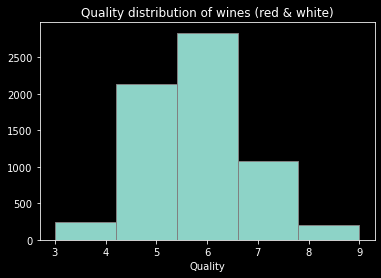

mean -  5.818377712790519
median -  6
mode -  6
standart_deviation -  0.8732552715311247
skewness -  0.18962269337269683
max quality -  9
min quality -  3


In [41]:
plt.title("Quality distribution of wines (red & white)")
plt.xlabel("Quality")
#plt.ylabel("Count")
plt.style.use("dark_background")
plt.hist(wines["quality"],bins=5,edgecolor="grey")
plt.show()
#color="red",bins=10 "fivethirtyeight"

print("mean - ",statss.mean(wines["quality"]))
print("median - ",statss.median(wines["quality"]))
print("mode - ",statss.mode(wines["quality"]))
print("standart_deviation - ",statss.stdev(wines["quality"]))
print("skewness - ",wines["quality"].skew())
print("max quality - ",np.max(wines["quality"]))
print("min quality - ",np.min(wines["quality"]))

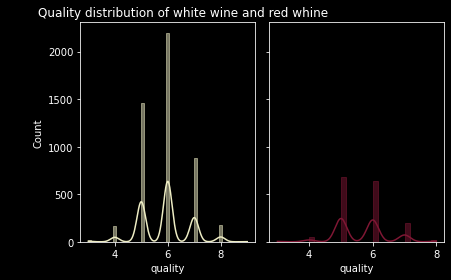

skewness white_wine -  0.15579639772222578
max quality white_wine -  9
min quality white_wine -  3
skewness red_whine -  0.21780157547366327
max quality red_whine -  8
min quality red_whine -  3


In [42]:
fig, axs=plt.subplots(1,2,tight_layout=True,sharey=True)
axs[0].set_title("        Quality distribution of white wine and red whine")
axs[1].set_title("") 

sns.histplot(data=white_wine2,ax=axs[0],x="quality",color='#EEEDC4',label="white wine",edgecolor='#EEEDC4', linewidth=0.5,kde=True)
sns.histplot(data=red_wine2,ax=axs[1],x="quality",color='#7F1734',label="red wine",edgecolor='#7F1734', linewidth=0.5,kde=True)

plt.show()

#print("mean white_wine - ",stats.mean(white_wine2["quality"]))
#print("median white_wine- ",stats.median(white_wine2["quality"]))
#print("mode white_wine - w",stats.mode(white_wine2["quality"]))
#print("standart_deviation white_wine - ",stats.stdev(white_wine2["quality"]))
print("skewness white_wine - ",white_wine2["quality"].skew())
print("max quality white_wine - ",np.max(white_wine2["quality"]))
print("min quality white_wine - ",np.min(white_wine2["quality"]))

#print("mean red_whine - ",stats.mean(red_wine2["quality"]))
#print("median red_whine- ",stats.median(red_wine2["quality"]))
#print("mode red_whine - ",stats.mode(red_wine2["quality"]))
#print("standart_deviation red_whine - ",stats.stdev(red_wine2["quality"]))
print("skewness red_whine - ",red_wine2["quality"].skew())
print("max quality red_whine - ",np.max(red_wine2["quality"]))
print("min quality red_whine - ",np.min(red_wine2["quality"]))

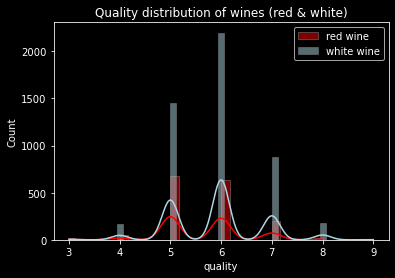

In [43]:
sns.histplot(data=red_wine2,x="quality",color='red',label="red wine",edgecolor='grey', linewidth=0.5,kde=True)
sns.histplot(data=white_wine2,x="quality",color='lightblue',label="white wine",edgecolor='grey', linewidth=0.5,kde=True)
plt.legend()
plt.title("Quality distribution of wines (red & white)")

plt.show()

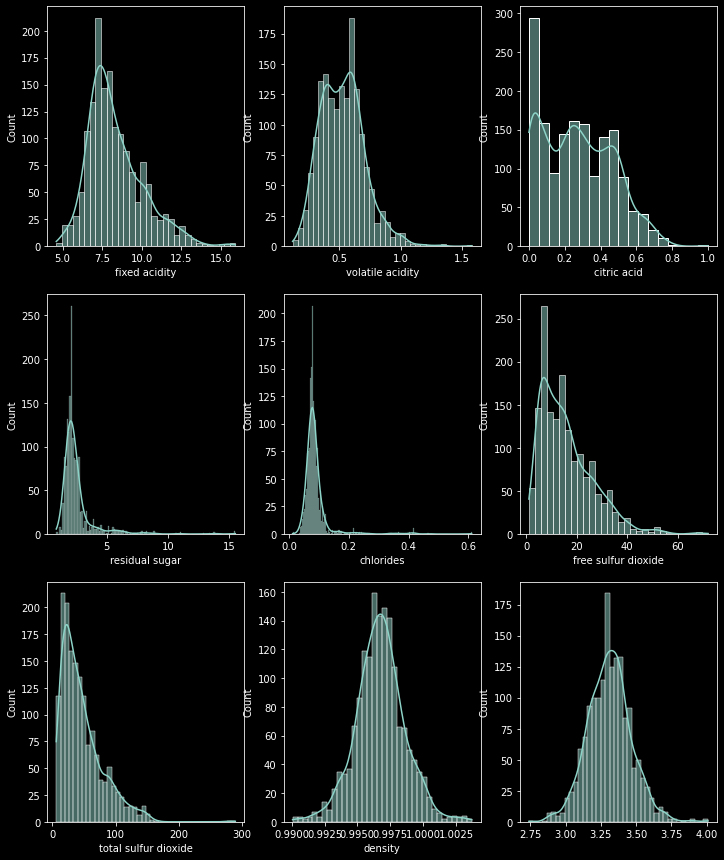

In [44]:
#Red Wine. Distribution of chemical variables
fig,axs=plt.subplots(3,3,figsize=(12,15))
sns.histplot(data=red_wine2,x="fixed acidity",kde=True,ax=axs[0,0])
sns.histplot(data=red_wine2,x="volatile acidity",kde=True,ax=axs[0,1])
sns.histplot(data=red_wine2,x="citric acid",kde=True,ax=axs[0,2])
sns.histplot(data=red_wine2,x="residual sugar",kde=True,ax=axs[1,0])
sns.histplot(data=red_wine2,x="chlorides",kde=True,ax=axs[1,1])
sns.histplot(data=red_wine2,x="free sulfur dioxide",kde=True,ax=axs[1,2])
sns.histplot(data=red_wine2,x="total sulfur dioxide",kde=True,ax=axs[2,0])
sns.histplot(data=red_wine2,x="density",kde=True,ax=axs[2,1])
sns.histplot(data=red_wine2,x="pH",kde=True,ax=axs[2,2])
plt.xlabel("")
plt.show()

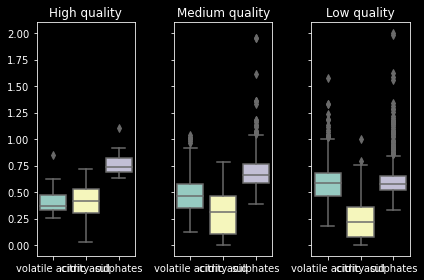

In [45]:
#Red wine acidity

fig,axs=plt.subplots(1,3,sharey=True,tight_layout=True)
axs[0].set_title("High quality")
axs[1].set_title("Medium quality")
axs[2].set_title("Low quality")

g_dm3_red=red_wine2[["volatile acidity", "citric acid", "sulphates","quality_label"]]

sns.boxplot(data=g_dm3_red[(g_dm3_red["quality_label"])=="high"],ax=axs[0])
sns.boxplot(data=g_dm3_red[(g_dm3_red["quality_label"])=="medium"],ax=axs[1])
sns.boxplot(data=g_dm3_red[(g_dm3_red["quality_label"])=="low"],ax=axs[2])
plt.ylabel=("g/dm3 ")



#sns.boxplot(data=red_wine2[(red_wine2["quality_label"])=="high"])
#plt.legend()
#plt.title("????")
plt.show()


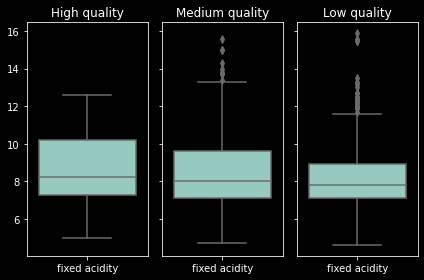

In [46]:
#Red wine fixed acidity

from turtle import color


fig,axs=plt.subplots(1,3,sharey=True,tight_layout=True)
axs[0].set_title("High quality")
axs[1].set_title("Medium quality")
axs[2].set_title("Low quality")
g_dm3_fixed_ac_red=red_wine2[["fixed acidity","quality_label"]]
sns.boxplot(data=g_dm3_fixed_ac_red[(g_dm3_fixed_ac_red["quality_label"])=="high"],ax=axs[0])
sns.boxplot(data=g_dm3_fixed_ac_red[(g_dm3_fixed_ac_red["quality_label"])=="medium"],ax=axs[1])
sns.boxplot(data=g_dm3_fixed_ac_red[(g_dm3_fixed_ac_red["quality_label"])=="low"],ax=axs[2])
plt.ylabel=("g/dm3 ",color=="white")


plt.show()


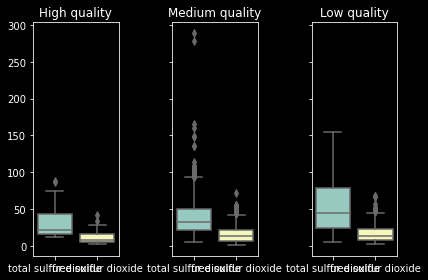

In [47]:
#Red wine fixed dioxide

from turtle import color


fig,axs=plt.subplots(1,3,sharey=True,tight_layout=True)
axs[0].set_title("High quality")
axs[1].set_title("Medium quality")
axs[2].set_title("Low quality")
mg_dm3_dioxide_red=red_wine2[["total sulfur dioxide","free sulfur dioxide","quality_label"]]
sns.boxplot(data=mg_dm3_dioxide_red[(mg_dm3_dioxide_red["quality_label"])=="high"],ax=axs[0])
sns.boxplot(data=mg_dm3_dioxide_red[(mg_dm3_dioxide_red["quality_label"])=="medium"],ax=axs[1])
sns.boxplot(data=mg_dm3_dioxide_red[(mg_dm3_dioxide_red["quality_label"])=="low"],ax=axs[2])
plt.ylabel=("g/dm3 ",color=="white")

plt.show()

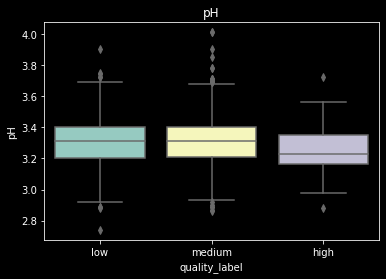

In [48]:
#Red wine pH
ph_red=red_wine2[["pH","quality_label"]]
sns.boxplot(data=ph_red,x="quality_label",y="pH")
plt.title("pH")
plt.show()

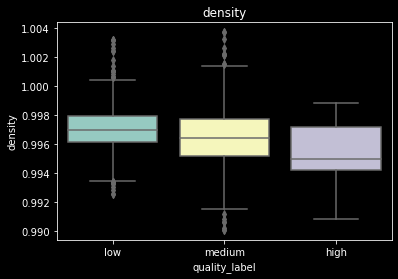

In [49]:
#Red wine density
density_red=red_wine2[["density","quality_label"]]
sns.boxplot(data=density_red,x="quality_label",y="density")
plt.ylabel=("g/cm3 ",color=="white")
plt.title("density")
plt.show()

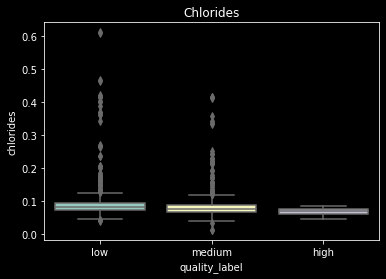

In [50]:
#Red wine Chlorides
chlorides_red=red_wine2[["chlorides","quality_label"]]
sns.boxplot(data=chlorides_red,x="quality_label",y="chlorides")
plt.title("Chlorides")
plt.show()

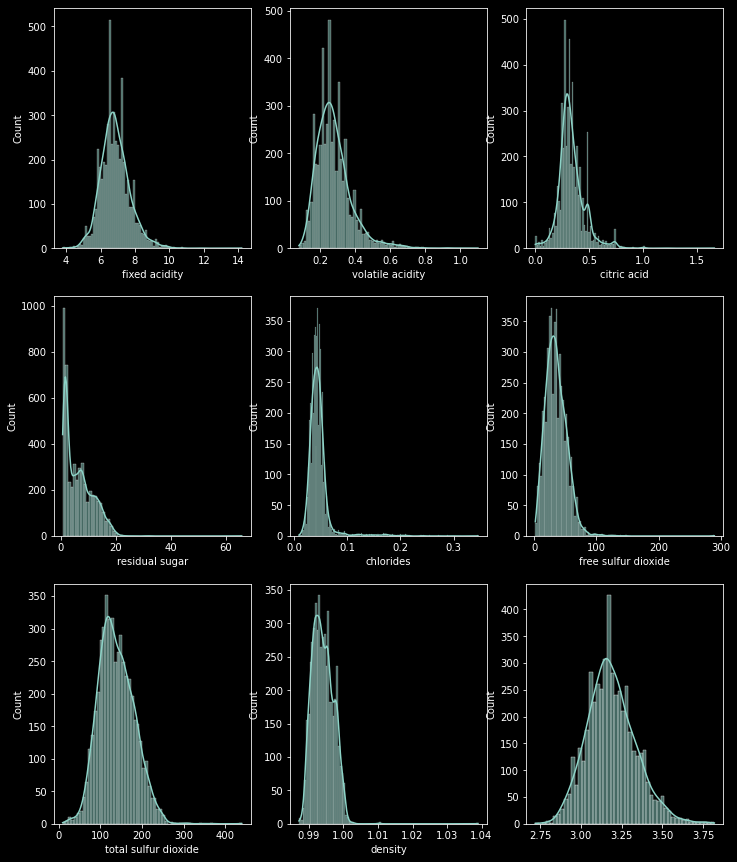

In [51]:
#White Wine. Distribution of chemical variables

fig,axs=plt.subplots(3,3,figsize=(12,15))
sns.histplot(data=white_wine2,x="fixed acidity",kde=True,ax=axs[0,0])
sns.histplot(data=white_wine2,x="volatile acidity",kde=True,ax=axs[0,1])
sns.histplot(data=white_wine2,x="citric acid",kde=True,ax=axs[0,2])
sns.histplot(data=white_wine2,x="residual sugar",kde=True,ax=axs[1,0])
sns.histplot(data=white_wine2,x="chlorides",kde=True,ax=axs[1,1])
sns.histplot(data=white_wine2,x="free sulfur dioxide",kde=True,ax=axs[1,2])
sns.histplot(data=white_wine2,x="total sulfur dioxide",kde=True,ax=axs[2,0])
sns.histplot(data=white_wine2,x="density",kde=True,ax=axs[2,1])
sns.histplot(data=white_wine2,x="pH",kde=True,ax=axs[2,2])
plt.xlabel("")
plt.show()

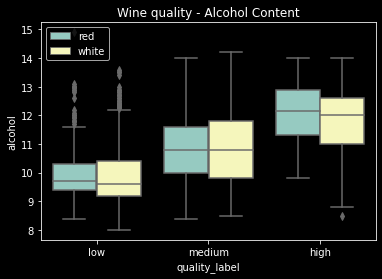

In [52]:
sns.boxplot(data=wines,x="quality_label",y="alcohol",hue="wine_color")
plt.legend()
plt.title("Wine quality - Alcohol Content")
plt.show()

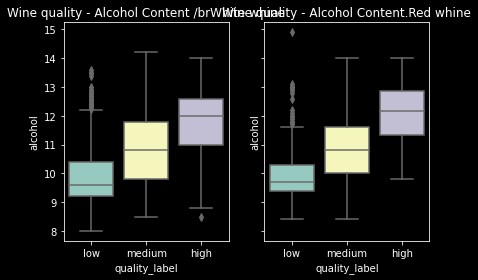

In [53]:
#SIZE!?

fig, axs=plt.subplots(1,2,tight_layout=True,sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.9, left=0.8, top=0.9)
axs[0].set_title("Wine quality - Alcohol Content /br" "White whine")
axs[1].set_title("Wine quality - Alcohol Content.Red whine")
sns.boxplot(data=white_wine2,x="quality_label",ax=axs[0],y="alcohol")
sns.boxplot(data=red_wine2,x="quality_label",ax=axs[1],y="alcohol")


plt.show()

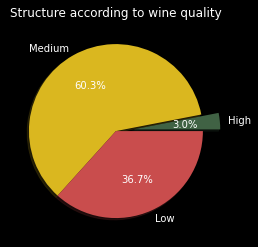

In [54]:
# Pie chart "The structure according to wine quality"

plt.title("Structure according to wine quality")
plt.style.use("dark_background")
total_labels=wines["quality_label"].value_counts()["high"]+wines["quality_label"].value_counts()["medium"]+wines["quality_label"].value_counts()["low"]
slices=[wines["quality_label"].value_counts()["high"]/total_labels,wines["quality_label"].value_counts()["medium"]/total_labels,wines["quality_label"].value_counts()["low"]/total_labels]
colors=["#406244","#dab71f","#c94d4d"]
mylabels=["High","Medium","Low"]
explode=(0.2,0,0)
plt.pie(slices,labels=mylabels,colors=colors, explode=explode,autopct="%1.1f%%",shadow=True)


plt.show()

#muted colors
#Green #406244
#Yellow #dab71f
#Red #c94d4d

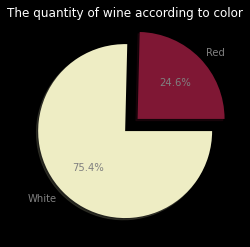

In [55]:
# Pie chart "The quantity of the wine according to color"

plt.title("The quantity of wine according to color")
plt.style.use("dark_background")
total_wine_color=wines["wine_color"].value_counts()["red"]+wines["wine_color"].value_counts()["white"]
slices=[wines["wine_color"].value_counts()["red"]/total_wine_color,wines["wine_color"].value_counts()["white"]/total_wine_color]
colors=["#7F1734","#EEEDC4"]
labels=["Red","White"]
explode=(0.2,0,)
plt.pie(slices,labels=labels,colors=colors, explode=explode,autopct="%1.1f%%",textprops={'color':"grey"},shadow=True)


plt.show()

#muted colors

#Yellow #dab71f
#Red #c94d4d

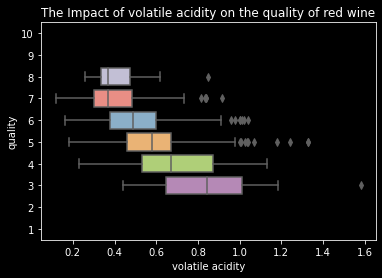

In [56]:
#Scater plot The Impact of  volatile acidity on  red wine quality
sns.boxplot(data=red_wine2,x="volatile acidity", y="quality",orient="h",order=(10,9,8,7,6,5,4,3,2,1))
plt.title("The Impact of volatile acidity on the quality of red wine")
plt.show()

# Best wines have lower level of acidity. I assume, that these wines are the oldest wines in our data set. 

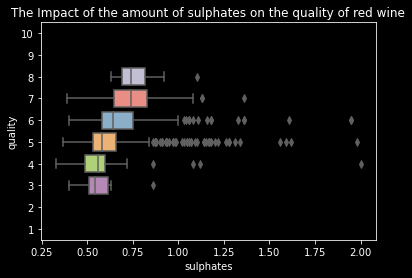

In [57]:
#Scater plot The Impact of  sulphates on  red wine quality
sns.boxplot(data=red_wine2,x="sulphates", y="quality",orient="h",order=(10,9,8,7,6,5,4,3,2,1))
plt.title("The Impact of the amount of sulphates on the quality of red wine")
plt.show()

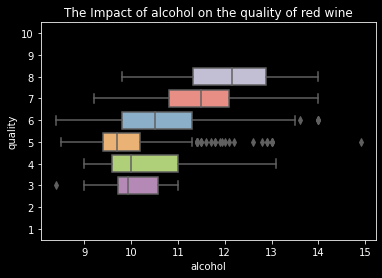

In [58]:
#Scater plot The Impact of  alcohol on  red wine quality
sns.boxplot(data=red_wine2,x="alcohol", y="quality",orient="h",order=(10,9,8,7,6,5,4,3,2,1))
plt.title("The Impact of alcohol on the quality of red wine")
plt.show()

# Less sugar -> higher quality for both: red & white wines

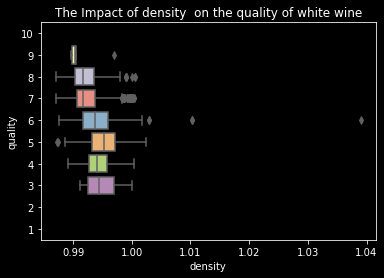

In [59]:
#Scater plot The Impact of  density on  white wine quality
sns.boxplot(data=white_wine2,x="density", y="quality",orient="h",order=(10,9,8,7,6,5,4,3,2,1))
plt.title("The Impact of density  on the quality of white wine")
plt.show()

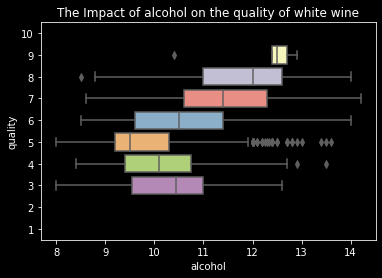

In [60]:
#Scater plot The Impact of  alcohol on  white wine quality
sns.boxplot(data=white_wine2,x="alcohol", y="quality",orient="h",order=(10,9,8,7,6,5,4,3,2,1))
plt.title("The Impact of alcohol on the quality of white wine")
plt.show()

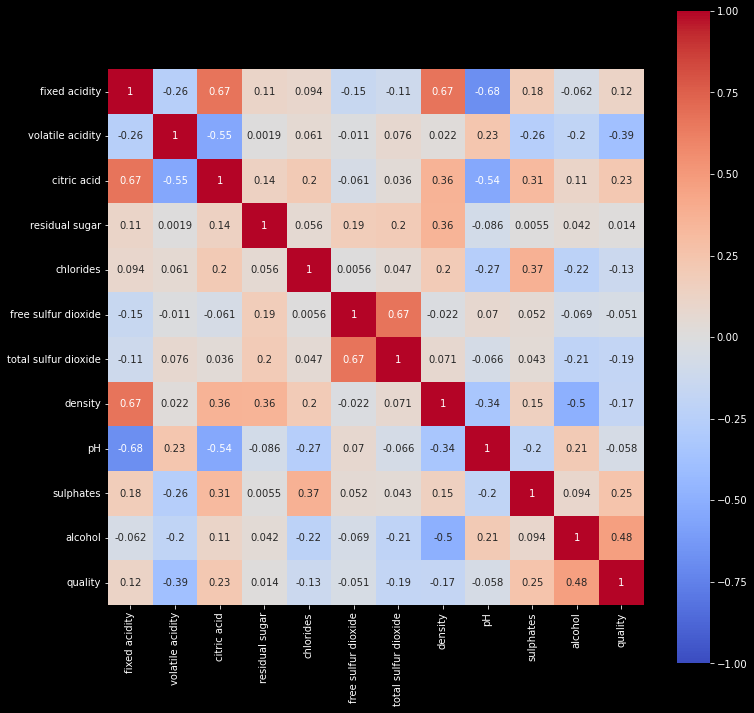

In [61]:
matrix_red=red_wine2.corr()
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(matrix_red,cmap="coolwarm",vmin=-1,vmax=1,annot=True,square=True,robust=True)
plt.show()

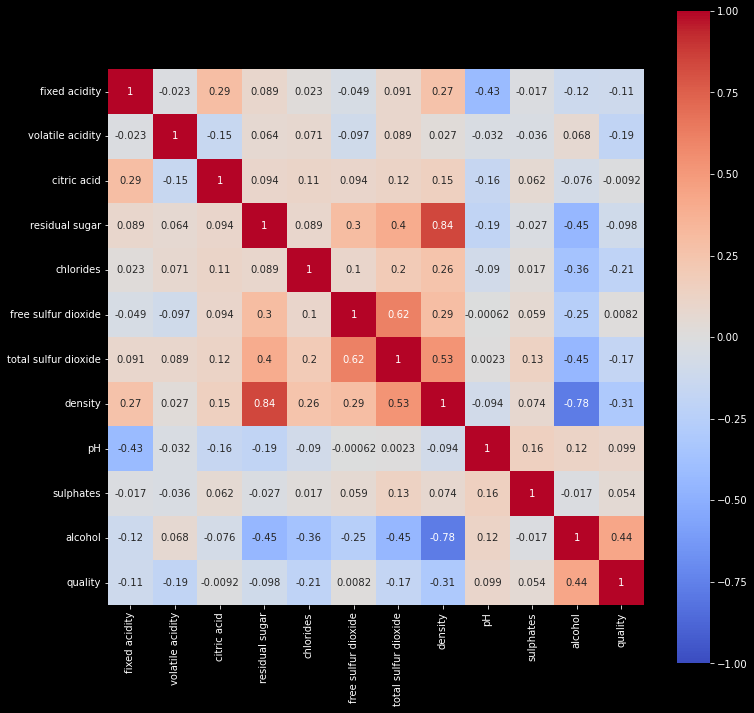

In [62]:
matrix_white=white_wine2.corr()
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(matrix_white,cmap="coolwarm",vmin=-1,vmax=1,annot=True,square=True,robust=True)
plt.show()

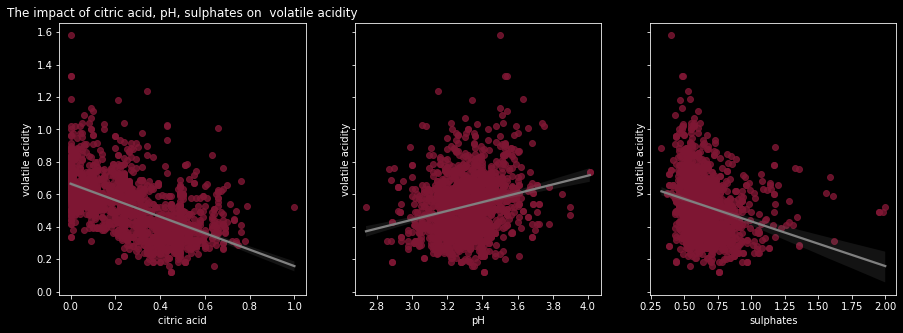

In [63]:
#The impact of citric acid,pH,sulphates on volatile acidity

from tkinter import Y


fig,axs=plt.subplots(1,3,figsize=(15,5),sharey=True)
axs[0].set_title("The impact of citric acid, pH, sulphates on  volatile acidity")
axs[1].set_title("")
axs[2].set_title("")
sns.regplot(data=red_wine2,y="volatile acidity",x="citric acid",ax=axs[0],scatter_kws={"color": "#7F1734"},line_kws={"color": "grey"})
sns.regplot(data=red_wine2,y="volatile acidity",x="pH",ax=axs[1],scatter_kws={"color": "#7F1734"},line_kws={"color": "grey"})
sns.regplot(data=red_wine2,y="volatile acidity",x="sulphates",ax=axs[2],scatter_kws={"color": "#7F1734"},line_kws={"color": "grey"})

plt.show()

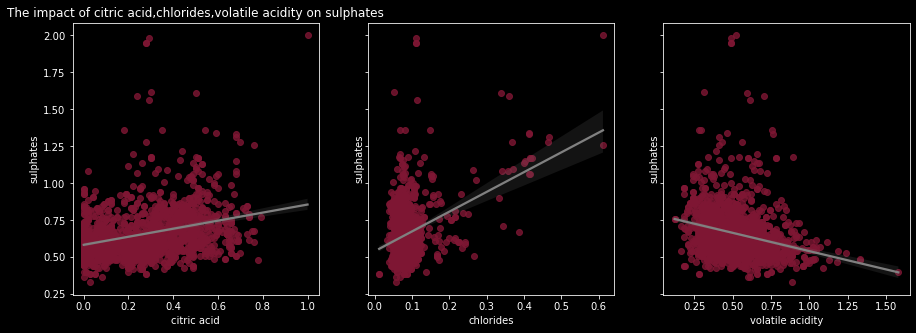

In [64]:
#The impact of citric acid,chlorides, volatile acidity on sulphates

from tkinter import Y


fig,axs=plt.subplots(1,3,figsize=(15,5),sharey=True)
axs[0].set_title("The impact of citric acid,chlorides,volatile acidity on sulphates")
axs[1].set_title("")
axs[2].set_title("")
sns.regplot(data=red_wine2,y="sulphates",x="citric acid",ax=axs[0],scatter_kws={"color": "#7F1734"},line_kws={"color": "grey"})
sns.regplot(data=red_wine2,y="sulphates",x="chlorides",ax=axs[1],scatter_kws={"color": "#7F1734"},line_kws={"color": "grey"})
sns.regplot(data=red_wine2,y="sulphates",x="volatile acidity",ax=axs[2],scatter_kws={"color": "#7F1734"},line_kws={"color": "grey"})

plt.show()

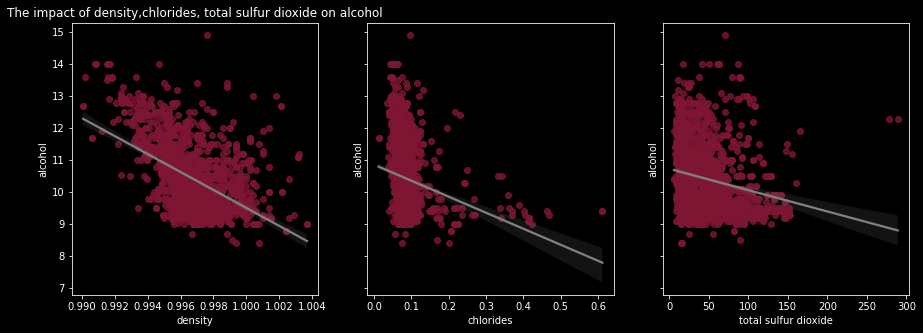

In [65]:
#The impact of density,chlorides, total sulfur dioxide on alcohol

from tkinter import Y


fig,axs=plt.subplots(1,3,figsize=(15,5),sharey=True)
axs[0].set_title("The impact of density,chlorides, total sulfur dioxide on alcohol")
axs[1].set_title("")
axs[2].set_title("")
#colors2=["#dabf"] 
sns.regplot(data=red_wine2,y="alcohol",x="density",ax=axs[0],scatter_kws={"color": "#7F1734"},line_kws={"color": "grey"})
sns.regplot(data=red_wine2,y="alcohol",x="chlorides",ax=axs[1],scatter_kws={"color": "#7F1734"},line_kws={"color": "grey"})
sns.regplot(data=red_wine2,y="alcohol",x="total sulfur dioxide",ax=axs[2],scatter_kws={"color": "#7F1734"},line_kws={"color": "grey"})

plt.show()

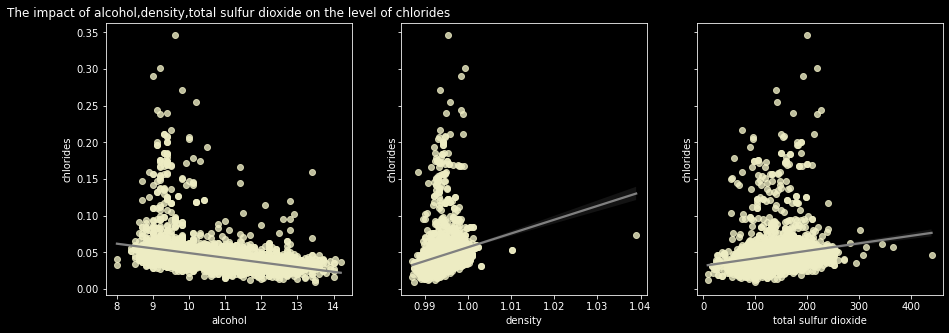

In [66]:
#The impact of the alcohol,density,total sulfur dioxide on the level of chlorides

from tkinter import Y


fig,axs=plt.subplots(1,3,figsize=(15,5),sharey=True)
axs[0].set_title("The impact of alcohol,density,total sulfur dioxide on the level of chlorides")
axs[1].set_title("")
axs[2].set_title("")
sns.regplot(data=white_wine2,y="chlorides",x="alcohol",ax=axs[0],scatter_kws={"color": "#EEEDC4"},line_kws={"color": "grey"})
sns.regplot(data=white_wine2,y="chlorides",x="density",ax=axs[1],scatter_kws={"color": "#EEEDC4"},line_kws={"color": "grey"})
sns.regplot(data=white_wine2,y="chlorides",x="total sulfur dioxide",ax=axs[2],scatter_kws={"color": "#EEEDC4"},line_kws={"color": "grey"})


plt.show()

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='density'>

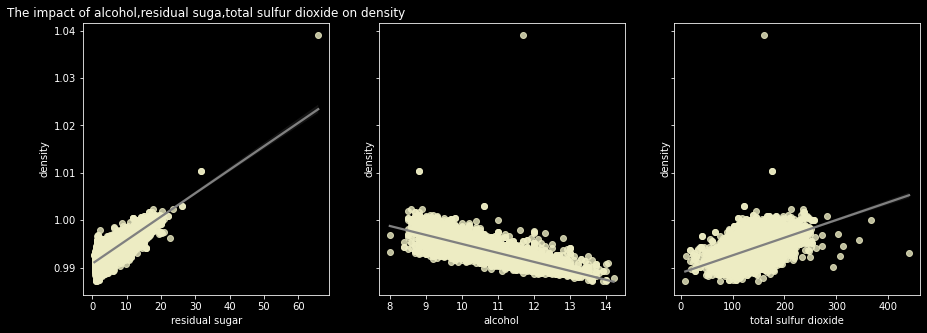

In [67]:
#The impact of alcohol,residual suga,total sulfur dioxide on density

from tkinter import Y


fig,axs=plt.subplots(1,3,figsize=(15,5),sharey=True)
axs[0].set_title("The impact of alcohol,residual suga,total sulfur dioxide on density")
axs[1].set_title("")
axs[2].set_title("")
sns.regplot(data=white_wine2,y="density",x="residual sugar",ax=axs[0],scatter_kws={"color": "#EEEDC4"},line_kws={"color": "grey"})
sns.regplot(data=white_wine2,y="density",x="alcohol",ax=axs[1],scatter_kws={"color": "#EEEDC4"},line_kws={"color": "grey"})
sns.regplot(data=white_wine2,y="density",x="total sulfur dioxide",ax=axs[2],scatter_kws={"color": "#EEEDC4"},line_kws={"color": "grey"})


#plt.show()

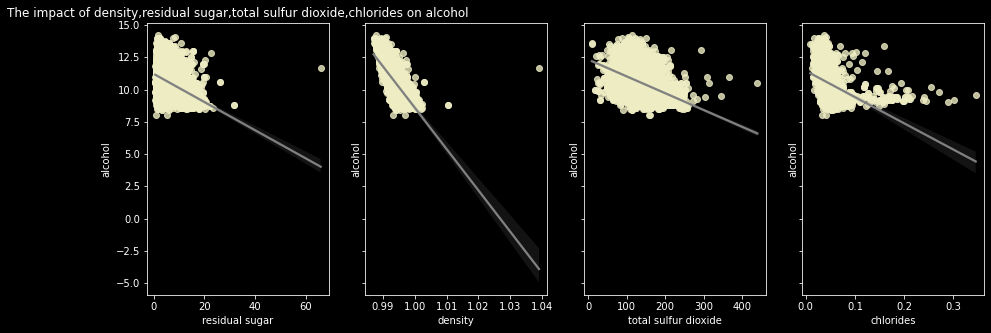

In [68]:
#The impact of density,residual sugar,total sulfur dioxide,chlorides on alcohol

fig,axs=plt.subplots(1,4,figsize=(15,5),sharey=True)
axs[0].set_title("The impact of density,residual sugar,total sulfur dioxide,chlorides on alcohol")
axs[1].set_title("")
axs[2].set_title("")
axs[3].set_title("")
sns.regplot(data=white_wine2,y="alcohol",x="residual sugar",ax=axs[0],scatter_kws={"color": "#EEEDC4"},line_kws={"color": "grey"})
sns.regplot(data=white_wine2,y="alcohol",x="density",ax=axs[1],scatter_kws={"color": "#EEEDC4"},line_kws={"color": "grey"})
sns.regplot(data=white_wine2,y="alcohol",x="total sulfur dioxide",ax=axs[2],scatter_kws={"color": "#EEEDC4"},line_kws={"color": "grey"})
sns.regplot(data=white_wine2,y="alcohol",x="chlorides",ax=axs[3],scatter_kws={"color": "#EEEDC4"},line_kws={"color": "grey"})

plt.show()

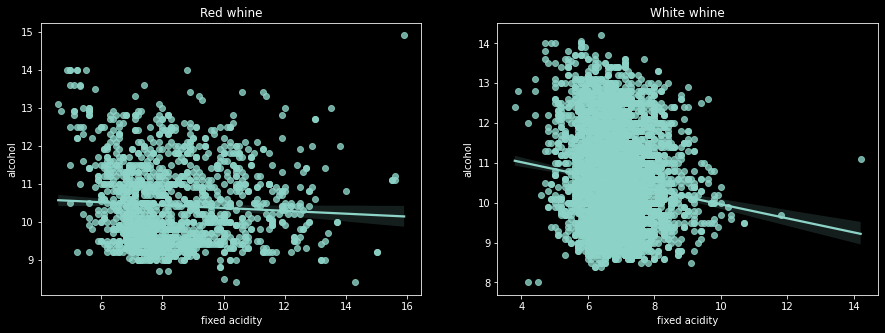

In [69]:
#Correlation between alcohol level and volatile acidity 

fig,axs=plt.subplots(1,2,figsize=(15,5))
axs[0].set_title("Red whine")
axs[1].set_title("White whine")
sns.regplot(data=red_wine2,x="fixed acidity",y="alcohol",ax=axs[0])
sns.regplot(data=white_wine2,x="fixed acidity",y="alcohol",ax=axs[1])

plt.show()

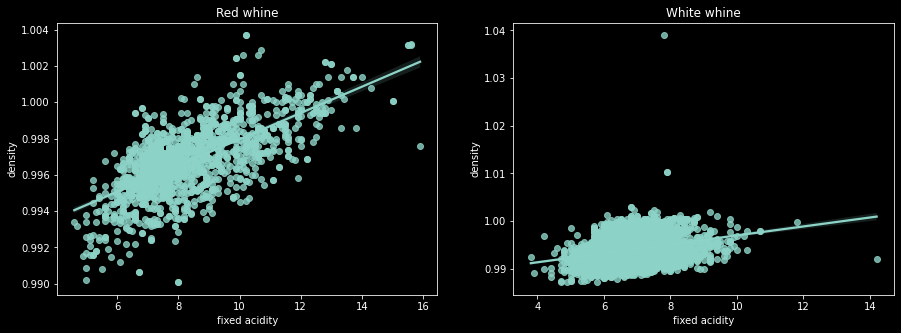

In [70]:
#Correlation between density level and fixed acidity 

fig,axs=plt.subplots(1,2,figsize=(15,5))
axs[0].set_title("Red whine")
axs[1].set_title("White whine")
sns.regplot(data=red_wine2,x="fixed acidity",y="density",ax=axs[0])
sns.regplot(data=white_wine2,x="fixed acidity",y="density",ax=axs[1])
plt.show()

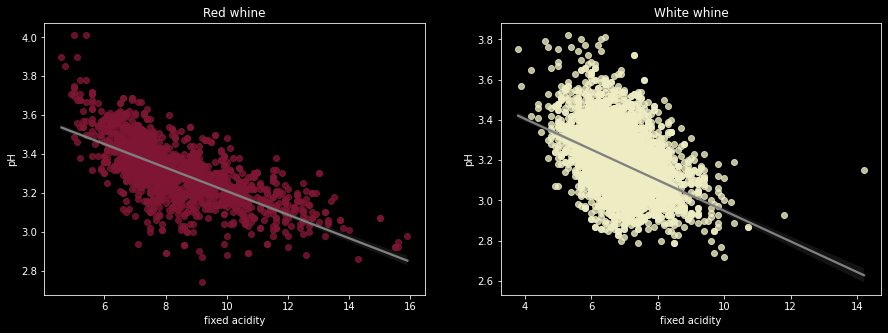

In [71]:
#Correlation between pH level and fixed acidity 
#The bigger acidity - the lower pH

fig,axs=plt.subplots(1,2,figsize=(15,5))
axs[0].set_title("Red whine")
axs[1].set_title("White whine")
sns.regplot(data=red_wine2,x="fixed acidity",y="pH",ax=axs[0],scatter_kws={"color": "#7F1734"},line_kws={"color": "grey"})
sns.regplot(data=white_wine2,x="fixed acidity",y="pH",ax=axs[1],scatter_kws={"color": "#EEEDC4"},line_kws={"color": "grey"})

plt.show()

ANOVA TEST RED WHINE

In [72]:
F,p=stats.f_oneway(red_wine2[red_wine2["quality_label"]=="low"]["alcohol"],
red_wine2[red_wine2["quality_label"]=="medium"]["alcohol"],
red_wine2[red_wine2["quality_label"]=="high"]["alcohol"])
print("f statistic",F,"p-value",p)

f statistic 205.23448800361507 p-value 4.776936653588672e-80


In [73]:
F,p=stats.f_oneway(red_wine2[red_wine2["quality_label"]=="low"]["sulphates"],
red_wine2[red_wine2["quality_label"]=="medium"]["sulphates"],
red_wine2[red_wine2["quality_label"]=="high"]["sulphates"])
print("f statistic",F,"p-value",p)

f statistic 41.83852380407374 p-value 1.9501375044481924e-18


In [74]:
F,p=stats.f_oneway(red_wine2[red_wine2["quality_label"]=="low"]["volatile acidity"],
red_wine2[red_wine2["quality_label"]=="medium"]["volatile acidity"],
red_wine2[red_wine2["quality_label"]=="high"]["volatile acidity"])
print("f statistic",F,"p-value",p)

f statistic 92.87437900766831 p-value 6.994633687008598e-39


ANOVA TEST WHITE WHINE

In [75]:
F,p=stats.f_oneway(white_wine2[white_wine2["quality_label"]=="low"]["chlorides"],
white_wine2[white_wine2["quality_label"]=="medium"]["chlorides"],
white_wine2[white_wine2["quality_label"]=="high"]["chlorides"])
print("f statistic",F,"p-value",p)

f statistic 90.87064418602546 p-value 1.7797433543986758e-39


In [76]:
F,p=stats.f_oneway(white_wine2[white_wine2["quality_label"]=="low"]["alcohol"],
white_wine2[white_wine2["quality_label"]=="medium"]["alcohol"],
white_wine2[white_wine2["quality_label"]=="high"]["alcohol"])
print("f statistic",F,"p-value",p)

f statistic 478.1628922043277 p-value 2.0647901873531918e-190


In [77]:
F,p=stats.f_oneway(white_wine2[white_wine2["quality_label"]=="low"]["density"],
white_wine2[white_wine2["quality_label"]=="medium"]["density"],
white_wine2[white_wine2["quality_label"]=="high"]["density"])
print("f statistic",F,"p-value",p)

f statistic 209.69457693191376 p-value 4.1941323440944663e-88


ENCODING

In [82]:
le=LabelEncoder()

In [83]:
red_wine2["Quality_Cat"]=le.fit_transform(red_wine2["quality_label"])

In [152]:

red_wine2[red_wine2["Quality_Cat"] == 2] 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality_Cat
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,2
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,2
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7,2
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2
1593,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,2
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2
1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2


In [132]:
red_wine2.iloc[:, 0:12]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [135]:
from pickle import TRUE


X=red_wine2.iloc[:, 0:12] #input
y=red_wine2.Quality_Cat #output
print(y)
print(y.shape)
print(X)
#print(red_wine2.head(1))

0       1
1       1
2       1
3       2
4       1
       ..
1594    1
1595    2
1596    2
1597    1
1598    2
Name: Quality_Cat, Length: 1599, dtype: int64
(1599,)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9       

SPLITING

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 12)
(320, 12)
(1279,)
(320,)


NORMALISATION

In [137]:
# fit scaler on training data
norm=MinMaxScaler().fit(X_train)

In [138]:
# transform training data
X_train_norm=norm.transform(X_train)

In [139]:
# transform testing data
X_test_norm=norm.transform(X_test)

In [140]:
print(X_train_norm)

[[0.21238938 0.3630137  0.02       ... 0.20359281 0.16923077 0.6       ]
 [0.49557522 0.20547945 0.57       ... 0.17964072 0.18461538 0.4       ]
 [0.05309735 0.15068493 0.         ... 0.2754491  0.86153846 0.6       ]
 ...
 [0.17699115 0.41438356 0.09       ... 0.09580838 0.36923077 0.6       ]
 [0.2300885  0.34931507 0.         ... 0.1497006  0.09230769 0.6       ]
 [0.39823009 0.19178082 0.5        ... 0.21556886 0.63076923 1.        ]]


PREDICTING


In [141]:
#LogisticRegression
lgr=LogisticRegression()
lgr.fit(X_train_norm,y_train)

LogisticRegression()

In [142]:
pred_lgr=lgr.predict(X_test_norm)

EVALUATION

In [157]:
# 0- high 
#1 - low
#2- medium
label=["high","low","medium"]
#np.unique(y_test)
cm=confusion_matrix(y_test,pred_lgr)
pd.DataFrame(cm,index=label,columns=label)

,high,low,medium
high,0,0,2
low,0,154,0
medium,0,0,164


In [147]:
labels

array([0, 1, 2])

In [144]:
print("accuracy_score -",accuracy_score(y_test,pred_lgr))

accuracy_score - 0.99375


In [160]:
print(classification_report(y_test,pred_lgr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00       154
           2       0.99      1.00      0.99       164

    accuracy                           0.99       320
   macro avg       0.66      0.67      0.66       320
weighted avg       0.99      0.99      0.99       320



/Users/Yanaorfin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Yanaorfin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Yanaorfin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
